# Thêm các thư viện cần thiết cho việc xây dựng mô hình

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# Bước 1: Tiền xử lý dữ liệu

In [2]:
# Tải dữ liệu 
loan_dataset = pd.read_csv('bank-full.csv',delimiter=';', quotechar='"')
loan_dataset.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
# Xóa các cột thừa thông tin
columns_drop = ['contact','day','month','duration','campaign','pdays','previous','poutcome','y']
loan_dataset.drop(columns = columns_drop, inplace = True)
loan_dataset.head(10)

,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,no,2143,yes,no
1,44,technician,single,secondary,no,29,yes,no
2,33,entrepreneur,married,secondary,no,2,yes,yes
3,47,blue-collar,married,unknown,no,1506,yes,no
4,33,unknown,single,unknown,no,1,no,no
5,35,management,married,tertiary,no,231,yes,no
6,28,management,single,tertiary,no,447,yes,yes
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no
8,58,retired,married,primary,no,121,yes,no
9,43,technician,single,secondary,no,593,yes,no


In [4]:
# Xem thông tin các cột
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [5]:
# Tinh chỉnh các cột có 2 giá trị về 0 và 1
loan_dataset.replace({'default': {'no': 0, 'yes': 1},
                     'housing': {'no': 0, 'yes': 1},
                     'loan': {'no': 0, 'yes': 1}},
                    inplace = True)
loan_dataset.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_25844\1510051978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'default': {'no': 0, 'yes': 1},


,age,job,marital,education,default,balance,housing,loan
0,58,management,married,tertiary,0,2143,1,0
1,44,technician,single,secondary,0,29,1,0
2,33,entrepreneur,married,secondary,0,2,1,1
3,47,blue-collar,married,unknown,0,1506,1,0
4,33,unknown,single,unknown,0,1,0,0


,age,job,marital,education,default,balance,housing,loan
0,58,management,married,2,0,2143,1,0
1,44,technician,single,1,0,29,1,0
2,33,entrepreneur,married,1,0,2,1,1
5,35,management,married,2,0,231,1,0
6,28,management,single,2,0,447,1,1
7,42,entrepreneur,divorced,2,1,2,1,0
8,58,retired,married,0,0,121,1,0
9,43,technician,single,1,0,593,1,0
10,41,admin.,divorced,1,0,270,1,0
11,29,admin.,single,1,0,390,1,0


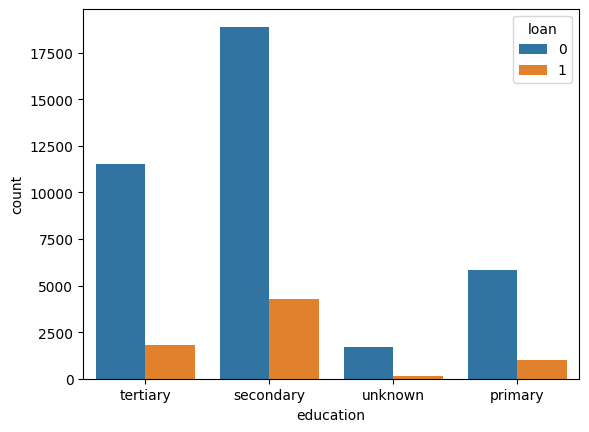

In [6]:
# Chỉnh cột education bằng cách xóa giá trị outlier
sns.countplot(x='education',hue='loan',data=loan_dataset)
loan_dataset = loan_dataset.drop(loan_dataset[loan_dataset['education'] == 'unknown'].index)

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Thay đổi các giá trị của cột education
loan_dataset['education'] = label_encoder.fit_transform(loan_dataset['education'])
loan_dataset.head(20)


,age,job,marital,education,default,balance,housing,loan
0,58,management,1,2,0,2143,1,0
1,44,technician,2,1,0,29,1,0
2,33,entrepreneur,1,1,0,2,1,1
5,35,management,1,2,0,231,1,0
6,28,management,2,2,0,447,1,1


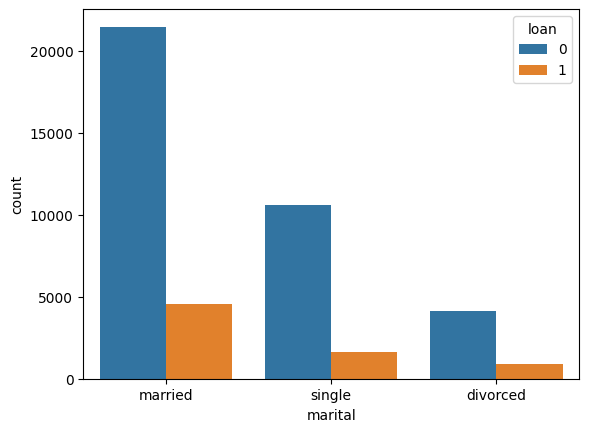

In [7]:
# Chỉnh cột martial 
sns.countplot(x='marital',hue='loan',data=loan_dataset)

# Thay đổi giá trị
loan_dataset['marital'] = label_encoder.fit_transform(loan_dataset['marital'])
loan_dataset.head()

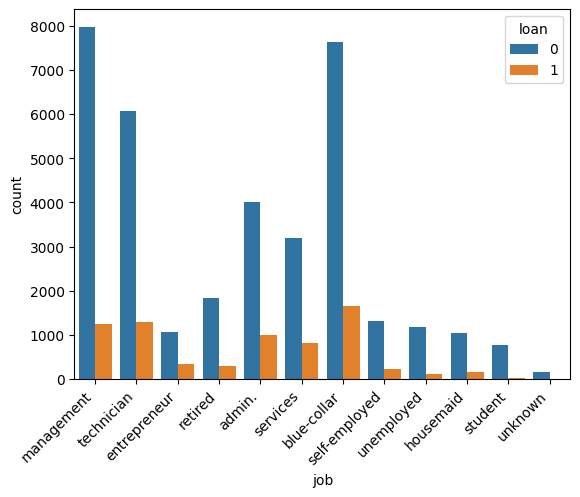

,age,job,marital,education,default,balance,housing,loan
0,58,4,1,2,0,2143,1,0
1,44,9,2,1,0,29,1,0
2,33,2,1,1,0,2,1,1
5,35,4,1,2,0,231,1,0
6,28,4,2,2,0,447,1,1
7,42,2,0,2,1,2,1,0
8,58,5,1,0,0,121,1,0
9,43,9,2,1,0,593,1,0
10,41,0,0,1,0,270,1,0
11,29,0,2,1,0,390,1,0


In [8]:
# Biểu diễn cột job
sns.countplot(x='job',hue='loan',data=loan_dataset)
plt.xticks(rotation=45, ha='right',)
plt.show()

loan_dataset = loan_dataset.drop(loan_dataset[loan_dataset['job'] == 'unknown'].index)
# Áp dụng LabelEncoder vào cột 'job'
loan_dataset['job'] = label_encoder.fit_transform(loan_dataset['job'])
loan_dataset.head(20)

In [9]:
# Bước 1: Tính số lượng quan sát có giá trị duy nhất trong cột độ tuổi
unique = loan_dataset['age'].unique()
n = len(unique)

# Bước 2: Tính số lượng nhóm k bằng công thức
k = int((2 * n) ** (1/3))

# Bước 3: Chia phạm vi độ tuổi thành các nhóm
min_age = loan_dataset['age'].min()
max_age = loan_dataset['age'].max()

# Tính độ rộng của mỗi nhóm
bin_width = (max_age - min_age) / k

# Tạo danh sách các giới hạn của các nhóm
age_bins = [min_age + i * bin_width for i in range(k)]
age_bins.append(max_age)  # Thêm giới hạn cuối cùng

# Tạo danh sách các nhãn nhóm
age_group_labels = [f"Nhóm {i+1}" for i in range(len(age_bins) - 1)]

# Sử dụng hàm cut để phân loại giá trị độ tuổi vào các nhóm
loan_dataset['age'] = pd.cut(loan_dataset['age'], bins=age_bins, labels=age_group_labels, right=False)

# Sử dụng LabelEncoder để mã hóa các nhãn nhóm thành các giá trị số
label_encoder = LabelEncoder()
loan_dataset['age'] = label_encoder.fit_transform(loan_dataset['age'])

# In ra dữ liệu mới đã phân loại và mã hóa
print("Các nhóm độ tuổi:")
for i in range(len(age_bins) - 1):
    print(f"Nhóm {i+1}: {age_bins[i]} - {age_bins[i+1]}")

print("\nDữ liệu mới đã phân loại và mã hóa:")
loan_dataset.head(10)


Các nhóm độ tuổi:
Nhóm 1: 18.0 - 33.4
Nhóm 2: 33.4 - 48.8
Nhóm 3: 48.8 - 64.2
Nhóm 4: 64.2 - 79.6
Nhóm 5: 79.6 - 95

Dữ liệu mới đã phân loại và mã hóa:


,age,job,marital,education,default,balance,housing,loan
0,2,4,1,2,0,2143,1,0
1,1,9,2,1,0,29,1,0
2,0,2,1,1,0,2,1,1
5,1,4,1,2,0,231,1,0
6,0,4,2,2,0,447,1,1
7,1,2,0,2,1,2,1,0
8,2,5,1,0,0,121,1,0
9,1,9,2,1,0,593,1,0
10,1,0,0,1,0,270,1,0
11,0,0,2,1,0,390,1,0


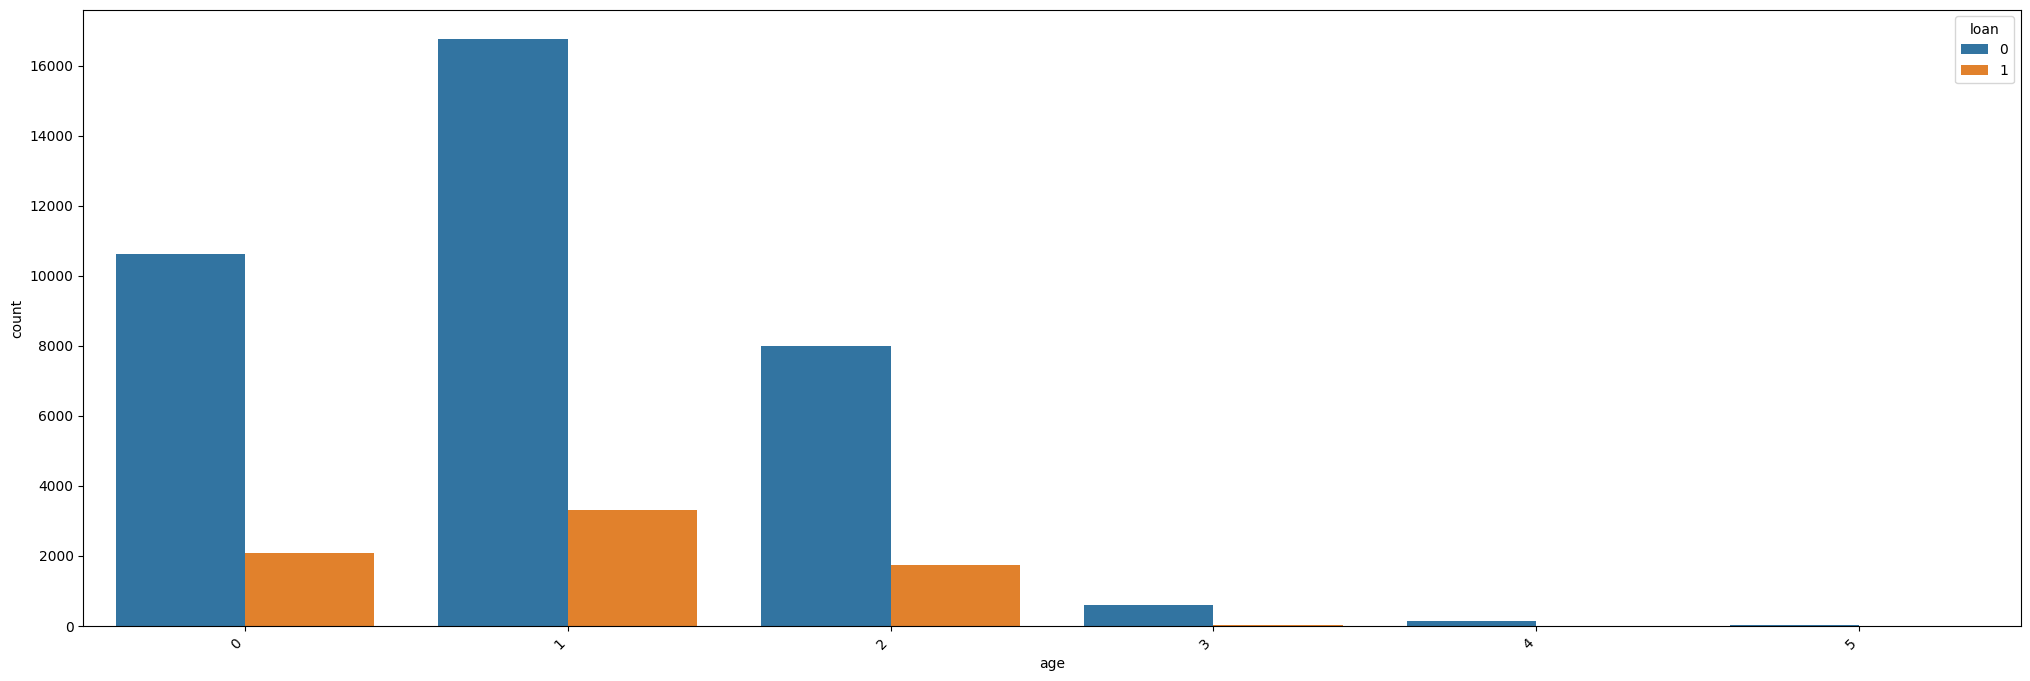

In [10]:
plt.figure(figsize=(25,8))  # Thay đổi kích thước của figure
sns.countplot(x='age', hue='loan', data=loan_dataset)
plt.xticks(rotation=45, ha='right',)  # Chỉnh chữ trên trục x
plt.show()

In [11]:
# Khởi tạo một đối tượng MinMaxScaler
numerical_cols = loan_dataset.select_dtypes(include=['int64']).columns

# Chuẩn hóa các cột số
scaler = MinMaxScaler()
loan_dataset[numerical_cols] = scaler.fit_transform(loan_dataset[numerical_cols])

# Hiển thị mô tả của dữ liệu đã chuẩn hóa
print(loan_dataset.describe())


                age           job       marital     education       default  \
count  43193.000000  43193.000000  43193.000000  43193.000000  43193.000000   
mean       0.967147      4.298775      1.166485      1.149608      0.018105   
std        0.773807      3.238402      0.609584      0.664907      0.133332   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      1.000000      1.000000      0.000000   
50%        1.000000      4.000000      1.000000      1.000000      0.000000   
75%        1.000000      7.000000      2.000000      2.000000      0.000000   
max        5.000000     10.000000      2.000000      2.000000      1.000000   

            balance       housing          loan  
count  43193.000000  43193.000000  43193.000000  
mean       0.085096      0.562406      0.164541  
std        0.027619      0.496096      0.370770  
min        0.000000      0.000000      0.000000  
25%        0.073448      0.000000     

# Bước 2: Xây dựng mô hình

## 2.1: Chia tập dữ liệu train và test


In [12]:
# X là bảng gồm các cột trừ cột loan
X = loan_dataset.drop('loan',axis = 1)
# y là cột label loan
y = loan_dataset['loan']
print(X)
print(y)

       age  job  marital  education  default   balance  housing
0        2    4        1          2      0.0  0.092259      1.0
1        1    9        2          1      0.0  0.073067      1.0
2        0    2        1          1      0.0  0.072822      1.0
5        1    4        1          2      0.0  0.074901      1.0
6        0    4        2          2      0.0  0.076862      1.0
...    ...  ...      ...        ...      ...       ...      ...
45206    2    9        1          2      0.0  0.080293      0.0
45207    3    5        0          0      0.0  0.088501      0.0
45208    3    5        1          1      0.0  0.124689      0.0
45209    2    1        1          1      0.0  0.078868      0.0
45210    1    2        1          1      0.0  0.099777      0.0

[43193 rows x 7 columns]
0        0.0
1        0.0
2        1.0
5        0.0
6        1.0
        ... 
45206    0.0
45207    0.0
45208    0.0
45209    0.0
45210    0.0
Name: loan, Length: 43193, dtype: float64


In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hàm đánh giá model và lưu kết quả vào DataFrame
def model_val(model, X, y):
    # Tách dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Tính toán và in các chỉ số đánh giá trên tập kiểm tra
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)
        
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
        precision_scores.append(precision_score(y_test_cv, y_pred_cv, average='weighted', zero_division=0))
        recall_scores.append(recall_score(y_test_cv, y_pred_cv, average='weighted', zero_division=0))
        f1_scores.append(f1_score(y_test_cv, y_pred_cv, average='weighted', zero_division=0))
    
    accuracy_mean, accuracy_std = np.round(np.mean(accuracy_scores), 3), np.round(np.std(accuracy_scores), 3)
    precision_mean, precision_std = np.round(np.mean(precision_scores), 3), np.round(np.std(precision_scores), 3)
    recall_mean, recall_std = np.round(np.mean(recall_scores), 3), np.round(np.std(recall_scores), 3)
    f1_mean, f1_std = np.round(np.mean(f1_scores), 3), np.round(np.std(f1_scores), 3)
      
    # Lưu kết quả vào DataFrame
    model_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        'Test Score': [f"{round(accuracy, 3)}", f"{round(precision, 3)}", f"{round(recall, 3)}", f"{round(f1, 3)}"],
        'Cross-validation Score': [f"{accuracy_mean} +/- {accuracy_std}",
                                   f"{precision_mean} +/- {precision_std}",
                                   f"{recall_mean} +/- {recall_std}",
                                   f"{f1_mean} +/- {f1_std}"]
    })
    
    return model_df


## 2.3: Thử nghiệm các dạng model với độ chính xác của từng loại model

### **Logistic Regression**

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

,Metric,Test Score,Cross-validation Score
0,Accuracy,0.832,0.835 +/- 0.0
1,Precision,0.692,0.698 +/- 0.0
2,Recall,0.832,0.835 +/- 0.0
3,F1-score,0.755,0.761 +/- 0.0


### **SVM**

In [15]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

,Metric,Test Score,Cross-validation Score
0,Accuracy,0.832,0.835 +/- 0.0
1,Precision,0.692,0.698 +/- 0.0
2,Recall,0.832,0.835 +/- 0.0
3,F1-score,0.755,0.761 +/- 0.0


### **Decision Tree Classifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

,Metric,Test Score,Cross-validation Score
0,Accuracy,0.784,0.793 +/- 0.002
1,Precision,0.775,0.786 +/- 0.001
2,Recall,0.784,0.793 +/- 0.002
3,F1-score,0.779,0.79 +/- 0.001


### **Random Forest Classifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_val(model,X,y)

,Metric,Test Score,Cross-validation Score
0,Accuracy,0.801,0.804 +/- 0.002
1,Precision,0.785,0.789 +/- 0.002
2,Recall,0.801,0.804 +/- 0.002
3,F1-score,0.792,0.796 +/- 0.002


### **XGBoost**

In [18]:
from xgboost  import XGBClassifier
model = XGBClassifier()
model_val(model,X,y)

,Metric,Test Score,Cross-validation Score
0,Accuracy,0.831,0.834 +/- 0.001
1,Precision,0.775,0.776 +/- 0.003
2,Recall,0.831,0.834 +/- 0.001
3,F1-score,0.766,0.772 +/- 0.001


### **Hyperparameter Tuning**

In [23]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

f1 = make_scorer(f1_score, average='weighted', zero_division=0)

# Điều chỉnh phạm vi siêu tham số
param_dist = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'eta': uniform(0.2, 0.3),  # Giảm phạm vi từ 0.2 - 0.5 thành 0.2 - 0.3
    'scale_pos_weight': randint(1, 50),  # Giảm phạm vi để tránh giá trị quá lớn
    'max_depth': randint(3, 8),  # Giảm phạm vi max_depth từ 3 - 10 thành 3 - 8
    'min_child_weight': randint(1, 6),  # Giảm phạm vi min_child_weight từ 2 - 12 thành 1 - 6
    'subsample': uniform(0.5, 0.5),  # Giảm phạm vi từ 0.6 - 1.0 thành 0.5 - 1.0
    'colsample_bytree': uniform(0.5, 0.5),  # Giảm phạm vi từ 0.5 - 1.5 thành 0.5 - 1.0
    'gamma': uniform(0, 0.3),  # Giảm phạm vi gamma từ 0 - 0.5 thành 0 - 0.3
    'lambda': uniform(1.0, 0.5),  # Giảm phạm vi lambda từ 1.0 - 2.5 thành 1.0 - 1.5
    'alpha': uniform(0.1, 0.3)  # Giảm phạm vi alpha từ 0.1 - 0.6 thành 0.1 - 0.3
}

# Thiết lập RandomizedSearchCV
gs = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    param_distributions=param_dist, 
    scoring=f1, 
    cv=StratifiedKFold(n_splits=5),
    n_iter=250,  # Giữ nguyên số lần lặp
    verbose=1,
    n_jobs=-1
)

# Thực hiện tìm kiếm
gs.fit(X, y)

# In ra các siêu tham số tốt nhất và điểm số tương ứng
print("Best parameters found: ", gs.best_params_)
print("Best cross-validation F1 score: ", gs.best_score_)



Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best parameters found:  {'alpha': 0.11292637061341138, 'booster': 'dart', 'colsample_bytree': 0.7485987693858509, 'eta': 0.2831060297787033, 'gamma': 0.12902218536065618, 'lambda': 1.2949762760824415, 'max_depth': 4, 'min_child_weight': 5, 'scale_pos_weight': 2, 'subsample': 0.9674741647899854}
Best cross-validation F1 score:  0.7790516468970131


# Bước 3: Sử dụng model

In [33]:
# Sử dụng model có độ chính xác cao nhất
best_params = {
    'alpha': 0.11,
    'booster': 'dart',
    'colsample_bytree': 0.75,
    'eta': 0.28,
    'gamma': 0.13,
    'lambda': 1.3,
    'max_depth': 4,
    'min_child_weight': 5,
    'scale_pos_weight': 2,
    'subsample': 0.97
}

# Khởi tạo mô hình XGBoost với các siêu tham số tối ưu
model_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
model_val(model_xgb,X,y)

,Metric,Test Score,Cross-validation Score
0,Accuracy,0.83,0.827 +/- 0.001
1,Precision,0.781,0.772 +/- 0.004
2,Recall,0.83,0.827 +/- 0.001
3,F1-score,0.781,0.781 +/- 0.003


In [30]:
import joblib
joblib.dump(model_xgb,'loan_approval_prediction')

['loan_approval_prediction']

# Bước 4: Xây dựng UI

In [31]:
import tkinter as tk
from tkinter import ttk
import joblib
import pandas as pd

def show_entry():
    age_str = age_var.get()
    age_mapping = {
        "18 - 33": 0,
        "34 - 48": 1,
        "49 - 64": 2,
        "65 - 79": 3,
        "80 - 95": 4
    }

    job_str = job_var.get()
    job_mapping = {
        "Quản trị viên": 0,
        "Doanh nhân": 2,
        "Quản lý": 4,
        "Ngành nghề trong lĩnh vực dịch vụ": 7,
        "Ngành nghề trong lĩnh vực kỹ thuật": 9,
        "Tự làm chủ": 6,
        "Công nhân": 1,
        "Nội trợ": 3,
        "Học sinh, sinh viên": 8,
        "Nghỉ hưu": 5,
        "Thất nghiệp": 10
    }

    mar_str = mar_var.get()
    mar_mapping = {
        "Đã ly hôn": 0,
        "Đã kết hôn": 1,
        "Độc thân": 2,
    }
    edu_str = edu_var.get()
    edu_mapping = {
        "Cấp 1": 0,
        "Cấp 2": 1,
        "Cấp 3": 2,
    }
    p1 = age_mapping[age_str]
    p2 = job_mapping[job_str]
    p3 = mar_mapping[mar_str]
    p4 = edu_mapping[edu_str]
    p5 = default_var.get()
    p6 = float(e6.get())
    p7 = home_var.get()

    model = joblib.load('loan_approval_prediction')
    df = pd.DataFrame(
        {
            'age': [p1],
            'job': [p2], 
            'marital': [p3],
            'education': [p4],
            'default': [p5],
            'balance': [p6],
            'housing': [p7],
        }
    )
    result = model.predict(df)
    if result == 1:
        result_label.config(text="Được duyệt")
    else:
        result_label.config(text="Không được duyệt")

# Tạo cửa sổ
import tkinter as tk
from tkinter import ttk
import joblib
import pandas as pd

def show_entry():
    age_str = age_var.get()
    age_mapping = {
        "18 - 33": 0,
        "34 - 48": 1,
        "49 - 64": 2,
        "65 - 79": 3,
        "80 - 95": 4
    }

    job_str = job_var.get()
    job_mapping = {
        "Quản trị viên": 0,
        "Doanh nhân": 2,
        "Quản lý": 4,
        "Ngành nghề trong lĩnh vực dịch vụ": 7,
        "Ngành nghề trong lĩnh vực kỹ thuật": 9,
        "Tự làm chủ": 6,
        "Công nhân": 1,
        "Nội trợ": 3,
        "Học sinh, sinh viên": 8,
        "Nghỉ hưu": 5,
        "Thất nghiệp": 10
    }

    mar_str = mar_var.get()
    mar_mapping = {
        "Đã ly hôn": 0,
        "Đã kết hôn": 1,
        "Độc thân": 2,
    }
    edu_str = edu_var.get()
    edu_mapping = {
        "Cấp 1": 0,
        "Cấp 2": 1,
        "Cấp 3": 2,
    }
    p1 = age_mapping[age_str]
    p2 = job_mapping[job_str]
    p3 = mar_mapping[mar_str]
    p4 = edu_mapping[edu_str]
    p5 = default_var.get()
    p6 = float(e6.get())
    p7 = home_var.get()

    model = joblib.load('loan_approval_prediction')
    df = pd.DataFrame(
        {
            'age': [p1],
            'job': [p2], 
            'marital': [p3],
            'education': [p4],
            'default': [p5],
            'balance': [p6],
            'housing': [p7],
        }
    )
    result = model.predict(df)
    if result == 1:
        result_label.config(text="Được duyệt")
    else:
        result_label.config(text="Không được duyệt")

# Tạo cửa sổ
master = tk.Tk()
master.title("Dự đoán hồ sơ cho vay")

# Tạo phần nhập liệu
input_frame = ttk.Frame(master, padding="20")
input_frame.grid(row=0, column=0, padx=20, pady=20)

label = ttk.Label(input_frame, text="Dự đoán hồ sơ cho vay", font=("Arial", 12, "bold"))
label.grid(row=0, column=0, columnspan=2, pady=10)

# Tạo dropdown menu cho nhóm tuổi
ttk.Label(input_frame, text="Nhóm tuổi").grid(row=1, column=0, sticky="w")
age_var = tk.StringVar()
age_combobox = ttk.Combobox(input_frame, textvariable=age_var, state="readonly", width=35)
age_combobox['values'] = ("18 - 33", "34 - 48", "49 - 64", "65 - 79", "80 - 95")
age_combobox.grid(row=1, column=1, pady=5)

# Tạo dropdown menu cho nghề nghiệp
ttk.Label(input_frame, text="Nghề nghiệp").grid(row=2, column=0, sticky="w")
job_var = tk.StringVar()
job_combobox = ttk.Combobox(input_frame, textvariable=job_var, state="readonly", width=35)
job_combobox['values'] = ("Quản trị viên", "Doanh nhân", "Quản lý", "Ngành nghề trong lĩnh vực dịch vụ",
                           "Ngành nghề trong lĩnh vực kỹ thuật", "Tự làm chủ", "Công nhân",
                            "Nội trợ", "Học sinh, sinh viên", "Nghỉ hưu", "Thất nghiệp")
job_combobox.grid(row=2, column=1, pady=5)

# Tạo dropdown menu cho tình trạng hôn nhân
ttk.Label(input_frame, text="Tình trạng hôn nhân").grid(row=3, column=0, sticky="w")
mar_var = tk.StringVar()
mar_combobox = ttk.Combobox(input_frame, textvariable=mar_var, state="readonly", width=35)
mar_combobox['values'] = ("Đã ly hôn", "Đã kết hôn","Độc thân")
mar_combobox.grid(row=3, column=1, pady=5)

# Tạo dropdown menu cho hệ giáo dục
ttk.Label(input_frame, text="Hệ giáo dục").grid(row=4, column=0, sticky="w", pady=5)
edu_var = tk.StringVar()
edu_combobox = ttk.Combobox(input_frame, textvariable=edu_var, state="readonly", width=35)
edu_combobox['values'] = ("Cấp 1","Cấp 2","Cấp 3")
edu_combobox.grid(row=4, column=1, pady=5)

radio_frame = ttk.Frame(input_frame)
radio_frame.grid(row=5, column=1, columnspan=2, sticky="w", padx=5, pady=5)

# Radio button cho nợ tín dụng
ttk.Label(input_frame, text="Nợ tín dụng").grid(row=5, column=0, sticky="w")
default_var = tk.IntVar()
default_yes_radio = ttk.Radiobutton(radio_frame, text="Có", variable=default_var, value=1)
default_no_radio = ttk.Radiobutton(radio_frame, text="Không", variable=default_var, value=0)
default_yes_radio.grid(row=5, column=1, sticky="w")
default_no_radio.grid(row=5, column=2, sticky="w", padx = 50)

# Số dư bình quân theo tháng
ttk.Label(input_frame, text="Số dư bình quân ($/tháng)").grid(row=6, column=0, sticky="w", pady=5)
e6 = ttk.Entry(input_frame)
e6.grid(row=6, column=1, pady=5)

radio_frame_2 = ttk.Frame(input_frame)
radio_frame_2.grid(row=7, column=1, columnspan=2, sticky="w", padx=5, pady=5)

# Radio button cho vay mua nhà
ttk.Label(input_frame, text="Vay mua nhà").grid(row=7, column=0, sticky="w")
home_var = tk.IntVar()
home_yes_radio = ttk.Radiobutton(radio_frame_2, text="Có", variable=home_var, value=1)
home_no_radio = ttk.Radiobutton(radio_frame_2, text="Không", variable=home_var, value=0)
home_yes_radio.grid(row=7, column=1, sticky="w")
home_no_radio.grid(row=7, column=2, sticky="w", padx=50)

# Nút dự đoán
predict_button = ttk.Button(input_frame, text="Dự đoán", command=show_entry)
predict_button.grid(row=8, column=0, columnspan=2, pady=10)

# Kết quả dự đoán
result_frame = ttk.Frame(master, padding="20")
result_frame.grid(row=1, column=0, padx=20, pady=20)

result_label = ttk.Label(result_frame, text="", font=("Arial", 12))
result_label.pack()

master.mainloop()

